In [21]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
from keras.callbacks import Callback
from sklearn.metrics import roc_auc_score
from keras.utils import to_categorical
import keras
import keras.utils
from keras import utils as np_utils
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype

%matplotlib inline


In [2]:
%pwd


'D:\\Python\\DataScience\\DataScience6105\\Assignment3'

In [3]:
path = 'D:\\Python\\DataScience\\DataScience6105\\Assignment3'


In [4]:
'''Read the data from the path'''
df_train = pd.read_csv(f'{path}/train.csv',header = None)
'''Show the data size'''
print(df_train.shape)
df_train.head(2)


C:\Users\Zhou\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(550069, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,User_ID,Produ2t_ID,Gender,0ge,O22up0tion,2ity_20tegory,St0y_In_2urrent_2ity_Ye0rs,10rit0l_St0tus,Produ2t_20tegory_1,Produ2t_20tegory_2,Produ2t_20tegory_3,Pur2h0se
1,1000001,P00069042,0.00,0.00,10.00,0.00,2.00,0.00,3.00,NaN,NaN,8370.00


# Pre-process data, train-test split

In [11]:
'''
Read the data and turn all the string into float to correct use DNN
'''
def str_to_float(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if pd.api.types.is_string_dtype(q): 
            my_df[p] = q.astype('float')
    return my_df

df_pre = df_train.iloc[1:1001,2:]
df = str_to_float(df_pre)
print(df.shape)
df.head(2)


(1000, 10)


,2,3,4,5,6,7,8,9,10,11
1,0.0,0.0,10.0,0.0,2.0,0.0,3.0,NaN,NaN,8370.0
2,0.0,0.0,10.0,0.0,2.0,0.0,1.0,6.0,14.0,15200.0


In [12]:
'''
Separate out X and Y
 pre-process the data by scaling/standardizing the 8 columns 
'''
X = df.iloc[:, :9]
Y = df.iloc[:, 9:10]


In [13]:
'''Split the two parts of the data and wait to split again for validation/test data'''
(X_train, X_valid_test, Y_train, Y_valid_test) = train_test_split(X, Y, test_size=0.4, random_state=1)
print(X_train.shape,X_valid_test.shape,Y_train.shape,Y_valid_test.shape)


(600, 9) (400, 9) (600, 1) (400, 1)


In [14]:
'''Split the second part of data to validation/test data'''
(X_valid, X_test, Y_valid, Y_test) = train_test_split(X_valid_test, Y_valid_test, test_size=0.5, random_state=1)
print(X_valid.shape,X_test.shape,Y_valid.shape,Y_test.shape)


(200, 9) (200, 9) (200, 1) (200, 1)


# Build and compile a deep learning model

In [25]:
'''Build the deep neural network'''
model = Sequential()
model.add(Dense(12, input_dim=9, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='tanh'))


C:\Users\Zhou\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=9, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Zhou\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Zhou\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="tanh", kernel_initializer="uniform")`
  """


In [28]:
'''Compile the DNN'''
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])


In [29]:
'''
Fit the DNN with train data
'''
hist = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=200, batch_size=5)


C:\Users\Zhou\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 600 samples, validate on 200 samples
Epoch 1/200
600/600 [==============================] - 0s 428us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/200
600/600 [==============================] - 0s 506us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/200
600/600 [==============================] - 0s 378us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/200
600/600 [==============================] - 0s 401us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/200
600/600 [==============================] - 0s 396us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/200
600/600 [==============================] - 0s 390us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/200
600/600 [==============================] - 0s 388us/step - l

In [30]:
'''Compile the DNN with another loss function'''
model.compile(loss='mean_squared_error', optimizer="rmsprop", metrics=["accuracy"])
model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=200, batch_size=5)


C:\Users\Zhou\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 600 samples, validate on 200 samples
Epoch 1/200
600/600 [==============================] - 0s 578us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/200
600/600 [==============================] - 0s 476us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/200
600/600 [==============================] - 0s 676us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/200
600/600 [==============================] - 0s 565us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/200
600/600 [==============================] - 0s 535us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/200
600/600 [==============================] - 0s 531us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/200
600/600 [==============================] - 0s 508us/step - l

In [31]:
'''Calculate the score'''
score = model.evaluate(X_test, Y_test, batch_size=5)
print(score)


200/200 [==============================] - 0s 215us/step
[nan, 0.0]


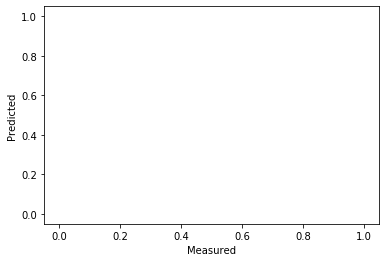

In [23]:
'''
Make the picture of regression
Can't make ROC curves or report AUC values because this is not a binary-classification probelm
'''
out = model.predict(X_test, batch_size=5)

fig, ax = plt.subplots()
ax.plot(X_test, out, 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
